<a href="https://colab.research.google.com/github/minjoo1412/2020_AI/blob/master/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EA%B3%BC%EC%A0%9C2(1%EB%B2%88~10%EB%B2%88)%EC%A0%95%EB%8B%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 선형회귀

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

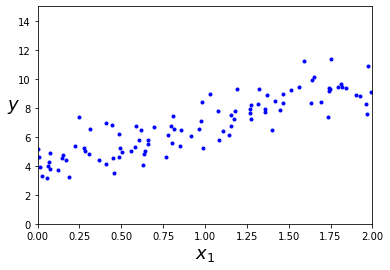

In [ ]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
# (1) 정답

X_b = np.c_[np.ones((100,1)), X] #모든 샘플에 x0=1을 추가함
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.98764797],
       [2.94641088]])

(1)번 해설
- 정규방정식을 사용한 선형 회귀의 최적해

In [ ]:
# (2) 정답

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)),X_new] #2*1차원의 행렬에 1을 넣고 이를 옆으로 붙이기
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.98764797],
       [9.88046972]])

(2)번 해설
- 최적의 세타 값을 사용해서 예측

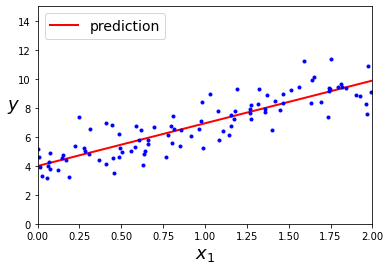

In [ ]:
# (3) 정답

plt.plot(X_new, y_predict, "r-", linewidth=2, label="prediction")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

(3)번 해설
- 제대로 그래프 그려졌는지 확인
- 해석이 정상 범위에 있는지 확인


In [ ]:
# (4) 정답

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.98764797],
       [2.94641088]])

(4)번 해설
- least squares 결과로 theta_best_svd는 least squares의 결과값


In [ ]:
# (5) 정답

np.linalg.pinv(X_b).dot(y)

array([[3.98764797],
       [2.94641088]])

(5)번 해설
- 유사역행렬을 사용한 세타 근사값 구하기

In [ ]:
# (6) 정답
#경사하강법을 사용한 선형 회귀 접근

eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) #랜덤 초기화
for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta * gradients
theta

array([[3.98764797],
       [2.94641088]])

(6)번 해설
- 경사하강법을 사용한 선형회귀 방법
- 세타가 약간 변화하면 비용함수가 어떻게 변화할지를 계산해야 하는데 이 과정이 미분 과정
- 여기에서 eta는 learning rate을 의미하고, 1000번을 반복하면서 세타를 갱신하면서 최적의 세타를 찾아 나아가는 것

In [ ]:
# (7) 정답

X_new_b.dot(theta)

array([[3.98764797],
       [9.88046972]])

(7)번 해설
- 예측값 출력

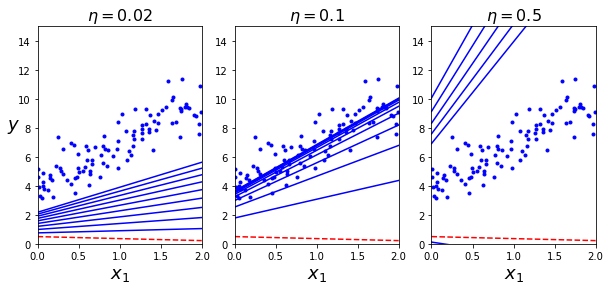

In [ ]:
# (8) 정답

theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
  

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

(8)번 해설
- 화면 제대로 출력됐는지 확인
- learning rate의 변화 값에 따라 너무 작으면 학습이 느리고, 너무 크면 최적해에 수렴하지 못함

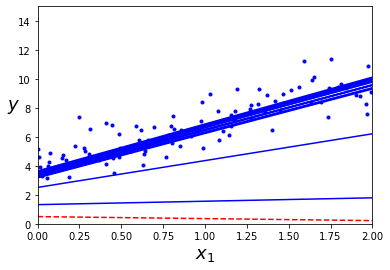

In [ ]:
# (9) 정답
#스토캐스틱 경사하강법을 사용한 선형 회귀 접근

theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0/ (t + t1)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta) 
    
    
plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                               
plt.show()     

(9)번 해설
- SGD를 사용한 y_predict값 출력 결과
- iteration에 따라 최적해에 수렴함

In [ ]:
# (10)번 정답

theta

array([[3.97275754],
       [2.94738753]])

(10)번 해설
- epoch 끝났을 때의 예측값
- 지금까지 위에서 예측한 세타 값과 유사함

In [ ]:
# (11)번 정답
##미니배치 경사 하강법을 사용한 선형회귀 접근

theta_path_mgd =[]

n_iterationns = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2, 1)

t0, t1 = 200, 1000
def learning_schedule(t):
  return t0/ (t + t1)

t = 0

for epoch in range(n_iterations):
  shuffled_indices = np.random.permutation(m) #배열 요소를 무작위로 섞음
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  for i in range(0, m, minibatch_size): #미니 배치 사이즈로 이동하면서 세타 구하기
    t += 1
    xi = X_b_shuffled[i:i+minibatch_size]
    yi = y_shuffled[i:i+minibatch_size]
    gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(t)
    theta = theta - eta*gradients
    theta_path_mgd.append(theta)
theta

array([[3.97991567],
       [2.93877136]])

(11)번 해설

- 마찬가지로 미니 배치를 사용해도 세타값이 유사하게 도출됨


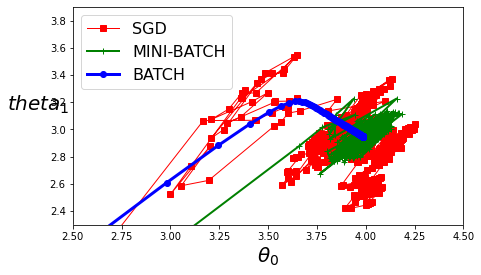

In [ ]:
# (12)번 정답

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="SGD")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="MINI-BATCH")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="BATCH")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

(12)번 해설
- SGD - 학습 방향이 튀는 경우가 있지만 최저해에 유사하게 수렴
- Mini-Batch - SGD보다 안정적으로 최적해에 수렴
- Batch - 가장 안정적으로 최적해에 수렴

# 2. 다차항회귀

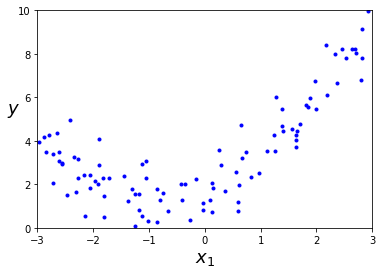

In [ ]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
# (1), (2)번 정답

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

(1), (2)번 해설
- X_poly에서 기존 X와 X^2값이 추가된 것을 확인할 수 있습니다.

In [ ]:
# (3)번 정답

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

(3)번 해설
- 모델에 fit한 후의 절편 값과 가중치 값

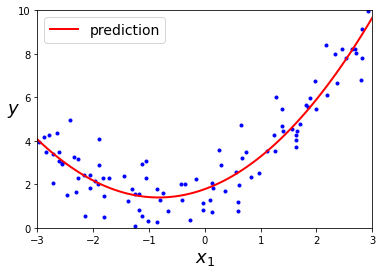

In [ ]:
# (4)번 정답

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="prediction")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

(4)번 해설
- 다차항에 대한 회귀

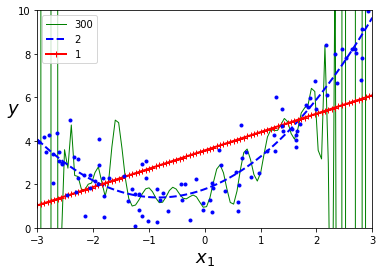

In [ ]:
# (5)번 정답

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
  polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
  std_scaler = StandardScaler()
  lin_reg = LinearRegression()
  polynomial_regression=Pipeline([
      ("poly_features", polybig_features),
      ("std_scaler", std_scaler),
      ("lin_reg", lin_reg),
  ])
  polynomial_regression.fit(X, y)
  y_newbig = polynomial_regression.predict(X_new)
  plt.plot(X_new, y_newbig, style, label=str(degree),linewidth=width)
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

(5)번 해설
- 다차항의 차수 증가에 따른 회귀 형태 변화
- 차수가 증가할수록 데이터에 과적합되는 것을 확인할 수 있음

# 3. 규제

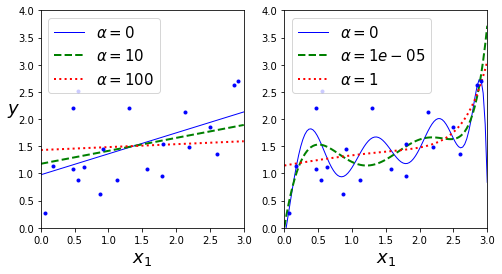

In [ ]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m ,1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)
def plot_model(model_class, polynomial, alphas, **model_kargs):
  for alpha, style in zip(alphas, ("b-", "g--", "r:")):
    model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
    if polynomial:
      model = Pipeline([
          ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
          ("std_scaler", StandardScaler()),
          ("regul_reg", model),
      ])
    model.fit(X, y)
    y_new_regul = model.predict(X_new)
    lw = 2 if alpha > 0 else 1
    plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
  plt.plot(X, y, "b.", linewidth = 3)
  plt.legend(loc="upper left", fontsize=15)
  plt.xlabel("$x_1$", fontsize=18)
  plt.axis([0, 3, 0, 4])
plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

해설
- 알파는 규제 강도를 의미하며, 규제 강도가 약할수록 과적합되는 것을 확인할 수 있음

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Unrecognized location 'conter right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


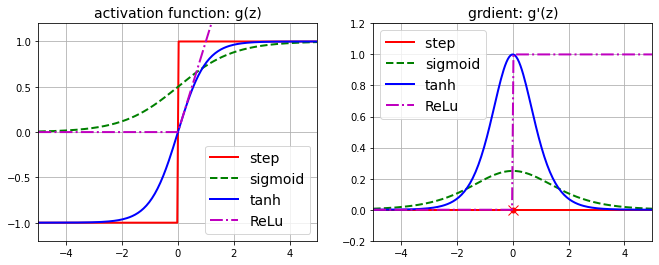

In [ ]:
from __future__ import division, print_function, unicode_literals

import os
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def logit(z):
  return 1 / (1+ np.exp(-z))

def relu(z):
  return np.maximum(0, z)
  
def derivative(f, z, eps=0.000001):
  return (f(z + eps) - f(z - eps))/(2 * eps)

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="step")
plt.plot(z, logit(z), "g--", linewidth=2, label="sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLu")
plt.grid(True)
plt.legend(loc="conter right", fontsize=14)
plt.title("activation function: g(z)", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="step ")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLu")
plt.grid(True)
plt.legend(loc="upper left", fontsize=14)
plt.title("grdient: g'(z)", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

- Step func: 0을 기준으로 0보다 크면 1, 0보다 작으면 -1이 출력되며, 연속적인 값을 출력할 수 없음. 미분 불가.
- sigmoid func: step function과 다르게 입력 값에 따라, 0~1 사이의 실수값을 출력함. 미분 가능하지만 값이 커지면 미분값이 0이 되어 vanishing gradient 문제 발생
- tanh func: sigmoid와 유사함. sigmoid와 다른점은 출력 범위가 -1 ~ +1 사이의 실수값이고, 중간값이 0.
- ReLU func: max(0,x) 값을 출력함. 값이 커져도 gradient vanishing 문제가 발생하지 않음. 0 이하의 값은 학습 시 가중치를 죽이는 dying relu라는 문제를 갖고 있음

# 5. 오류 역전파

In [ ]:
# (1)번

import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

np.random.seed(0)

N, D = 3, 4

x = np.random.randn(N, D)
y = np.random.randn(N, D)
z = np.random.randn(N, D)

a = x * y
b = a + z
c = np.sum(b)

In [ ]:
from IPython.display import Image
Image('IMG_4AD102BE6426-1.jpeg')

- 연산망 그래프를 직접 손으로 작성

In [ ]:
# (2)번

grad_c = 1.0
grad_b = grad_c * np.ones((N, D))
grad_a = grad_b.copy()
grad_z = grad_b.copy()
grad_x = grad_a * y
grad_y = grad_a * x

grad_c, grad_b, grad_a, grad_z, grad_x, grad_y

(1.0, array([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]), array([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]), array([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]), array([[ 0.76103773,  0.12167502,  0.44386323,  0.33367433],
        [ 1.49407907, -0.20515826,  0.3130677 , -0.85409574],
        [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502]]), array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ],
        [ 1.86755799, -0.97727788,  0.95008842, -0.15135721],
        [-0.10321885,  0.4105985 ,  0.14404357,  1.45427351]]))

(2)번 해설
각 연산의 미분 값
 - 더하기 = fan out
 - 곱하기 = swap multiplier

In [ ]:
# (3)번
import torch

x = torch.randn(N, D, requires_grad = True)
y = torch.randn(N, D, requires_grad = True)
z = torch.randn(N, D)

a = x * y
b = a + z
c = torch.sum(b)

c.backward()
print(x.grad, y.grad)

tensor([[ 1.3374, -1.3248,  1.6770, -0.7743],
        [-0.0883, -1.5710, -1.1670,  0.7236],
        [-0.2129, -1.1271, -0.2692, -0.6543]]) tensor([[-0.0871,  0.4612,  0.2433,  0.6188],
        [ 0.6300,  0.4984, -0.0208, -1.3129],
        [-1.4619, -0.0332, -0.3291, -0.2455]])


(4)번 정답
- (2)번은 직접 역전파를 수행한 것이고 (3)은 pytorch의 framework을 통한 자동 미분을 이용

# 10. MLP

In [ ]:
import torch
import torch.nn as nn

In [ ]:
# (1)번
U1 = torch.tensor([[-0.3, 1.0, 1.2],
                  [1.6, -1.0, -1.1]])
U2 = torch.tensor([[1.0, 1.0, -1.0],
                   [0.7, 0.5, 1.0]])
U3 = torch.tensor([[0.5, -0.8, 1.0],
                   [-0.1, 0.3, 0.4]])
U4 = torch.tensor([[1.0, 0.1, -0.2],
                   [-0.2, 1.3, -0.4]])

In [ ]:
# (2)번
sigmoid = nn.Sigmoid()
X = torch.tensor([[1.0, 1.0, 0.0]])
X_new = torch.tensor([[1.0]])

h_1 = X.mm(U1.T)
h_1 = sigmoid(h_1)
h_1 = torch.cat((X_new, h_1), dim=1)

h_2 = h_1.mm(U2.T)
h_2 = sigmoid(h_2)
h_2 = torch.cat((X_new, h_2), dim=1)

h_3 = h_2.mm(U3.T)
h_3 = sigmoid(h_3)
h_3 = torch.cat((X_new, h_3), dim=1)

output = h_3.mm(U4.T)
output = sigmoid(output)

result_sigmoid = output
print(result_sigmoid)

tensor([[0.7202, 0.6081]])


In [ ]:
# (3)번
relu = nn.ReLU()

X = torch.tensor([[1.0, 1.0, 0.0]])
X_new = torch.tensor([[1.0]])

h_1 = X.mm(U1.T)
h_1 = relu(h_1)
h_1 = torch.cat((X_new, h_1), dim=1)

h_2 = h_1.mm(U2.T)
h_2 = relu(h_2)
h_2 = torch.cat((X_new, h_2), dim=1)

h_3 = h_2.mm(U3.T)
h_3 = relu(h_3)
h_3 = torch.cat((X_new, h_3), dim=1)

output = h_3.mm(U4.T)
output = relu(output)
s
result_relu = output
print(result_relu)

tensor([[0.9490, 1.0950]])


In [ ]:
# 4번
criterion = nn.MSELoss()
label = torch.tensor([[0.0, 1.0]])
loss = criterion(result_relu, label)
print('Previous loss: ', loss)

U3 = torch.tensor([[0.5, -0.8, 0.9],
                   [-0.1, 0.3, 0.4]])

relu = nn.ReLU()

X = torch.tensor([[1.0, 1.0, 0.0]])
X_new = torch.tensor([[1.0]])

h_1 = X.mm(U1.T)
h_1 = relu(h_1)
h_1 = torch.cat((X_new, h_1), dim=1)

h_2 = h_1.mm(U2.T)
h_2 = relu(h_2)
h_2 = torch.cat((X_new, h_2), dim=1)

h_3 = h_2.mm(U3.T)
h_3 = relu(h_3)
h_3 = torch.cat((X_new, h_3), dim=1)

output = h_3.mm(U4.T)
output = relu(output)

loss = criterion(output, label)
print('Current loss: ', loss)


Previous loss:  tensor(0.4548)
Current loss:  tensor(0.4419)


- 가중치를 갱신했을 때, 오류가 감소했음을 확인